# Validation of Trained Models

In [1]:
import os
import torch

# Set-up CUDA device
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="4"

# Use GPU for inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

# Check the GPU name
if device.type == 'cuda':
    gpu_name = torch.cuda.get_device_name(0)  # 0 because CUDA_VISIBLE_DEVICES=4 means GPU 4 is now 0
    print("Using GPU:", gpu_name)

Using device: cuda
Using GPU: NVIDIA A100-SXM4-40GB


In [ ]:
# COMPILE MODEL WEIGHTS IN ONE DIRECTORY
# import os
# import shutil


# # List of general folders
# folder_paths = ["YOLO11-freeze-all", "YOLO11-freeze-backbone", "YOLO11-full"]
# destination_dir = "best_weights"

# # List to store paths to the weights
# weights_paths = []

# # Iterate through each folder
# for folder_path in folder_paths:
#     # Recursively find the target file
#     for root, dirs, files in os.walk(folder_path):
#         if "best.pt" in files:
#             folder_name = folder_path.replace("YOLO11-", "-")
#             new_name = os.path.basename(os.path.dirname(root)).replace("-train", "") + folder_name  + ".pt"

#             source_file = os.path.join(root, "best.pt")
#             destination_file = os.path.join(destination_dir, new_name)

#             shutil.copy(source_file, destination_file)

In [5]:
import os

# List of general folders
folder_path = "best_weights"

# Get all weights in folder_path
weights_paths = os.listdir(folder_path)
weights_paths = [folder_path + '/' + path for path in weights_paths]

for path in weights_paths:
    print(path)

best_weights/yolo11m-seg-freeze-all.pt
best_weights/yolo11m-freeze-backbone.pt
best_weights/yolo11s-seg-full.pt
best_weights/yolo11s-seg-freeze-all.pt
best_weights/yolo11m-full.pt
best_weights/yolo11s-freeze-backbone.pt
best_weights/yolo11l-seg-freeze-all.pt
best_weights/yolo11m-freeze-all.pt
best_weights/yolo11n-seg-freeze-backbone.pt
best_weights/yolo11s-freeze-all.pt
best_weights/yolo11l-seg-freeze-backbone.pt
best_weights/yolo11n-full.pt
best_weights/yolo11n-seg-full.pt
best_weights/yolo11s-seg-freeze-backbone.pt
best_weights/yolo11n-freeze-all.pt
best_weights/yolo11l-full.pt
best_weights/yolo11n-seg-freeze-all.pt
best_weights/yolo11s-full.pt
best_weights/yolo11l-freeze-all.pt
best_weights/yolo11m-seg-full.pt
best_weights/yolo11m-seg-freeze-backbone.pt
best_weights/yolo11l-freeze-backbone.pt
best_weights/yolo11l-seg-full.pt
best_weights/yolo11n-freeze-backbone.pt


## Evaluate Models

In [ ]:
from ultralytics import YOLO

detect_metrics = []
segment_metrics = []

for weights_path in weights_paths:
    model = YOLO(weights_path, task="detect")
    metrics = model.val(device=device, verbose=False)
    detect_metrics.append(metrics)

    del model
    del metrics

for weights_path in weights_paths:
    if "seg" in weights_path:
        model = YOLO(weights_path, task="segment")
        metrics = model.val(device=device, verbose=False)
        segment_metrics.append(metrics)

        del model
        del metrics
        

YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.42it/s]


                   all       1119       2301      0.837      0.738      0.827      0.692       0.83      0.732      0.815      0.664
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/segment/val25
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.57it/s]


                   all       1119       2301      0.954      0.936      0.965      0.888
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val13
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [02:22<00:00,  2.04s/it] 


                   all       1119       2301      0.952      0.946       0.97       0.89      0.947      0.946      0.963      0.848
Speed: 0.2ms preprocess, 100.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/segment/val26
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:40<00:00,  1.71it/s]


                   all       1119       2301      0.794      0.662      0.756      0.617      0.789      0.654      0.742      0.582
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/val27
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.65it/s]


                   all       1119       2301      0.959      0.949       0.97        0.9
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val14
YOLO11s summary (fused): 238 layers, 9,422,088 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


                   all       1119       2301      0.948       0.92      0.959      0.864
Speed: 0.5ms preprocess, 2.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val15
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:23<00:00,  2.94it/s]


                   all       1119       2301      0.862      0.754       0.85      0.718       0.86       0.75      0.839      0.683
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/val28
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:11<00:00,  6.01it/s]


                   all       1119       2301      0.819      0.746      0.826      0.685
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val16
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/70 [00:01<01:37,  1.42s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:36<00:00,  1.90it/s]


                   all       1119       2301      0.937      0.878      0.931      0.819      0.934      0.873      0.923      0.768
Speed: 3.1ms preprocess, 10.6ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/segment/val29
YOLO11s summary (fused): 238 layers, 9,422,088 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [01:25<00:00,  1.22s/it]


                   all       1119       2301       0.79       0.67      0.763      0.622
Speed: 21.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val17
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [01:00<00:00,  1.16it/s]


                   all       1119       2301      0.952      0.938      0.966      0.895      0.949      0.936      0.962      0.855
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/val30
YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:14<00:00,  4.79it/s]


                   all       1119       2301      0.944      0.928      0.962      0.862
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val18
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]


                   all       1119       2301      0.948      0.921      0.962      0.865       0.95      0.916      0.954      0.814
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/val31
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [01:41<00:00,  1.45s/it]


                   all       1119       2301      0.944      0.913      0.958      0.866      0.942      0.908      0.951      0.815
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/segment/val32
YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:37<00:00,  1.84it/s]


                   all       1119       2301      0.699      0.584      0.646      0.521
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val19
YOLO11l summary (fused): 464 layers, 25,297,816 parameters, 0 gradients, 86.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:14<00:00,  4.88it/s]


                   all       1119       2301      0.955      0.954      0.974      0.907
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val20
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:13<00:00,  5.28it/s]


                   all       1119       2301      0.706      0.583      0.647       0.52      0.731      0.559      0.636      0.489
Speed: 0.3ms preprocess, 1.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/val33
YOLO11s summary (fused): 238 layers, 9,422,088 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.58it/s]


                   all       1119       2301      0.963       0.94      0.971      0.886
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val21
YOLO11l summary (fused): 464 layers, 25,297,816 parameters, 0 gradients, 86.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:11<00:00,  6.34it/s]


                   all       1119       2301      0.848      0.763      0.841      0.708
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val22
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:18<00:00,  3.81it/s]


                   all       1119       2301      0.957      0.954      0.975      0.908      0.956      0.951      0.969      0.869
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/val34
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 3/70 [00:26<06:55,  6.20s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:56<00:00,  1.25it/s]


                   all       1119       2301      0.948      0.933      0.958      0.882      0.944      0.934      0.955      0.841
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs/segment/val35
YOLO11l summary (fused): 464 layers, 25,297,816 parameters, 0 gradients, 86.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.27it/s]


                   all       1119       2301      0.952      0.938      0.967      0.895
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val23
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [04:11<00:00,  3.59s/it]  


                   all       1119       2301      0.961       0.96      0.976      0.911      0.963      0.953       0.97      0.874
Speed: 5.1ms preprocess, 51.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/segment/val36
YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [01:51<00:00,  1.60s/it]


                   all       1119       2301      0.932      0.887       0.94      0.824
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val24
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:39<00:00,  1.78it/s]


                   all       1119       2301      0.837      0.738      0.827      0.692       0.83      0.732      0.815      0.664
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/val37
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/70 [04:22<2:39:38, 140.86s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 3/70 [05:45<2:07:37, 114.29s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [09:46<00:00,  8.37s/it]  


                   all       1119       2301      0.952      0.934      0.961      0.882      0.946      0.934      0.954       0.84
Speed: 7.7ms preprocess, 230.9ms inference, 0.0ms loss, 75.3ms postprocess per image
Results saved to runs/segment/val38
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/70 [09:09<10:31:52, 549.46s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/70 [23:10<13:37:20, 721.18s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 3/70 [51:38<21:48:15, 1171.58s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [55:23<00:00, 47.48s/it]    


                   all       1119       2301      0.789      0.633      0.723      0.595      0.785      0.627      0.712      0.564
Speed: 399.6ms preprocess, 269.6ms inference, 0.0ms loss, 466.5ms postprocess per image
Results saved to runs/segment/val39
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/70 [05:22<6:10:41, 322.33s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 3/70 [36:46<14:43:13, 790.94s/it]

## Save Scores

In [ ]:
detect_mAP_scores = []
segment_mAP_scores = []

detect_inference_speed = []
segment_inference_speed = []

detect_mAP50_scores = []
detect_mAP75_scores = []
detect_mAP_classes = []
detect_overall_speed = []

segment_mAP50_scores = []
segment_mAP75_scores = []
segment_mAP_classes = []
segment_overall_speed = []

for metrics in detect_metrics:
    detect_mAP_scores.append(metrics.box.map)
    detect_inference_speed.append(metrics.speed['inference'])
    detect_mAP50_scores.append(metrics.box.map50)
    detect_mAP75_scores.append(metrics.box.map75)
    detect_mAP_classes.append(list(metrics.box.maps))
    detect_overall_speed.append(metrics.speed)


for metrics in segment_metrics:
    segment_mAP_scores.append(metrics.box.map)
    segment_inference_speed.append(metrics.speed['inference'])
    segment_mAP50_scores.append(metrics.box.map50)
    segment_mAP75_scores.append(metrics.box.map75)
    segment_mAP_classes.append(list(metrics.box.maps))
    segment_overall_speed.append(metrics.speed)

In [ ]:
detect_models = []
segment_models = []

for weights_path in weights_paths:
    # train type
    if "freeze-all" in weights_path:
        train_type = "freeze-all"
    elif "freeze-backbone" in weights_path:
        train_type = "freeze-backbone"
    else:
        train_type = "full"

    # model
    if "yolo11n" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11n-seg"
        else:
            model = "YOLO11n"
    elif "yolo11s" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11s-seg"
        else:
            model = "YOLO11s"
    elif "yolo11m" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11m-seg"
        else:
            model = "YOLO11m"
    elif "yolo11l" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11l-seg"
        else:
            model = "YOLO11l"
    
    detect_models.append(f"{model}-{train_type}")
    if "seg" in weights_path:
        segment_models.append(f"{model}-{train_type}")

In [ ]:
import json

detect_metrics_dict = {
    model: {"mAP (50-95)": mAP, 
            "mAP 50": mAP50,
            "mAP 75": mAP75,
            "class mAPs": maps,
            "inference_speed": inference_speed,
            "overall_speed": overall_speed
            }
    for model, mAP, mAP50, mAP75, maps, inference_speed, overall_speed 
                                        in zip(detect_models, 
                                              detect_mAP_scores, 
                                              detect_mAP50_scores,
                                              detect_mAP75_scores,
                                              detect_mAP_classes,
                                              detect_inference_speed,
                                              detect_overall_speed
                                              )
}

segment_metrics_dict = {
    model: {"mAP (50-95)": mAP, 
            "mAP 50": mAP50,
            "mAP 75": mAP75,
            "class mAPs": maps,
            "inference_speed": inference_speed,
            "overall_speed": overall_speed
            }
    for model, mAP, mAP50, mAP75, maps, inference_speed, overall_speed 
                                        in zip(segment_models, 
                                              segment_mAP_scores, 
                                              segment_mAP50_scores,
                                              segment_mAP75_scores,
                                              segment_mAP_classes,
                                              segment_inference_speed,
                                              segment_overall_speed
                                              )
}


In [ ]:
# Save to JSON file
with open("detect_metrics.json", "w") as f:
    json.dump(detect_metrics_dict, f, indent=4)


# Save to JSON file
with open("segment_metrics.json", "w") as f:
    json.dump(segment_metrics_dict, f, indent=4)

## Visualize mAP vs Speed

/tmp/ipykernel_368486/2269889507.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")


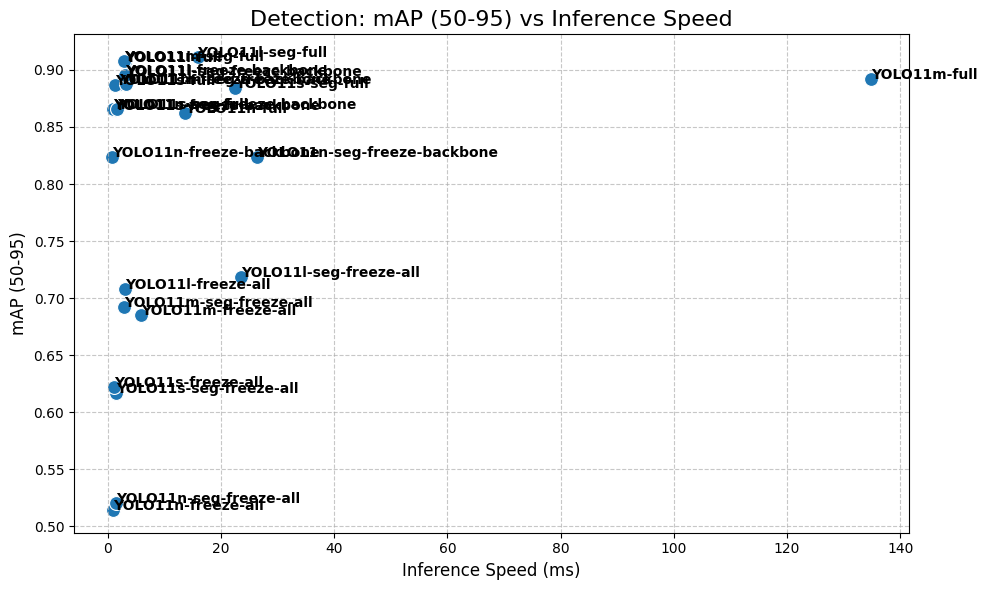

In [ ]:
%matplotlib inline
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON file
with open("detect_metrics.json", "r") as f:
    detect_metrics = json.load(f)

# Extract data into a list of dictionaries
data = []
for model_name, metrics in detect_metrics.items():
    data.append({
        "Model": model_name,
        "mAP (50-95)": metrics["mAP (50-95)"],
        "Inference Speed": metrics["inference_speed"]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")

# Annotate each point with the model name
for i in range(len(df)):
    plt.text(df["Inference Speed"].iloc[i], df["mAP (50-95)"].iloc[i], df["Model"].iloc[i], 
             horizontalalignment='left', size=10, color='black', weight='semibold')

# Add labels and title
plt.title("Detection: mAP (50-95) vs Inference Speed", fontsize=16)
plt.xlabel("Inference Speed (ms)", fontsize=12)
plt.ylabel("mAP (50-95)", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_368486/111459782.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")


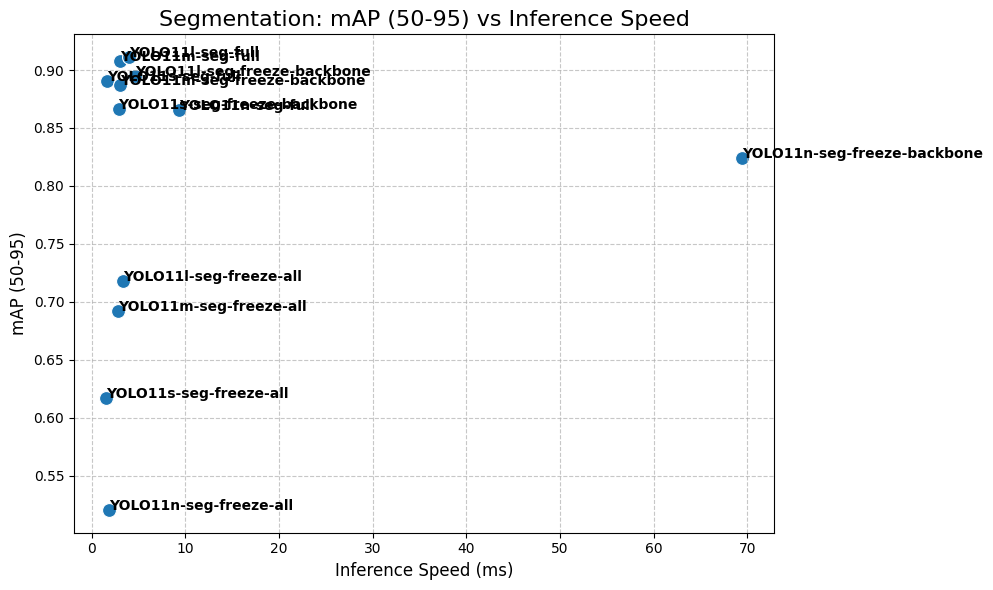

In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the segment_metrics JSON file
with open("segment_metrics.json", "r") as f:
    segment_metrics = json.load(f)

# Extract data into a list of dictionaries
data = []
for model_name, metrics in segment_metrics.items():
    data.append({
        "Model": model_name,
        "mAP (50-95)": metrics["mAP (50-95)"],
        "Inference Speed": metrics["inference_speed"]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Inference Speed", y="mAP (50-95)", data=df, s=100, palette="tab10")

# Annotate each point with the model name
for i in range(len(df)):
    plt.text(df["Inference Speed"].iloc[i], df["mAP (50-95)"].iloc[i], df["Model"].iloc[i], 
             horizontalalignment='left', size=10, color='black', weight='semibold')

# Add labels and title
plt.title("Segmentation: mAP (50-95) vs Inference Speed", fontsize=16)
plt.xlabel("Inference Speed (ms)", fontsize=12)
plt.ylabel("mAP (50-95)", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
